In [1]:
import pandas as pd

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [2]:
UMAP_POINTS = pd.read_json('data/umap-points.json', lines=True)

In [7]:
def plot_pair(d1, d2, title=None, dst=None):
    
    points = UMAP_POINTS.copy()
    points['hl'] = points.domain.apply(lambda d: d if d in (d1, d2) else 'other')

    plt.figure(figsize=(7,6), dpi=100)
    plt.xlim(-8,8)
    plt.ylim(-7,6)

    sns.scatterplot(
        x='x',
        y='y',
        data=points,
        s=0.2,
        edgecolor=None,
        alpha=0.5,
        hue='hl',
        palette={
            d1: 'blue',
            d2: 'red',
            'other': 'gray',
        },
    )

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title='test')
    
    if title:
        plt.title(title)
        
    if dst:
        plt.savefig(dst, bbox_inches='tight')

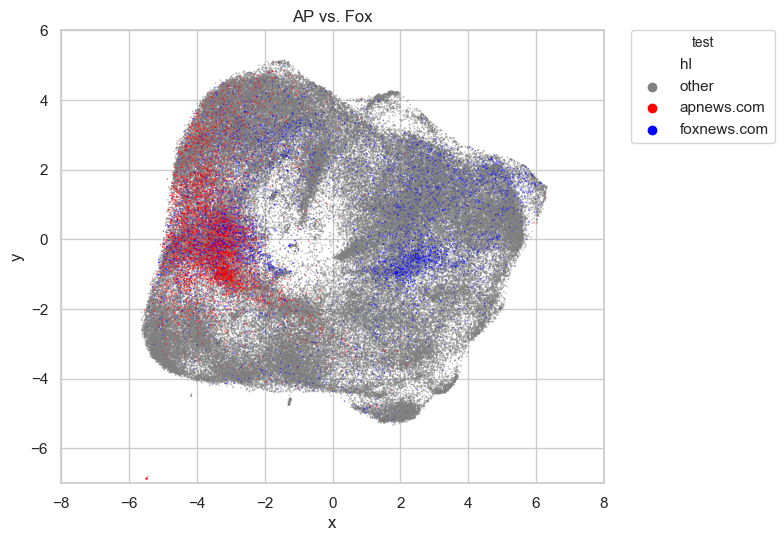

In [8]:
plot_pair('foxnews.com', 'apnews.com', 'AP vs. Fox')